In [2]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [3]:
def using_time(func):
    # decorator
    def _wrap(*args, **kwargs):
        s = time.time()
        result = func(*args, **kwargs)
        e = time.time() - s
        print('use time is : {}'.format(e))
        return result
    return _wrap

In [4]:
from fastai import *
from fastai.vision import *

In [5]:
path = untar_data(URLs.PETS); path

PosixPath('/Users/liyihao/.fastai/data/oxford-iiit-pet')

In [6]:
path.ls()

[PosixPath('/Users/liyihao/.fastai/data/oxford-iiit-pet/images'),
 PosixPath('/Users/liyihao/.fastai/data/oxford-iiit-pet/annotations')]

In [7]:
path_anno = path/'annotations'

In [8]:
path_anno

PosixPath('/Users/liyihao/.fastai/data/oxford-iiit-pet/annotations')

In [9]:
path_img = path/'images';path_img

PosixPath('/Users/liyihao/.fastai/data/oxford-iiit-pet/images')

In [10]:
fnames = get_image_files(path_img)

In [11]:
fnames[:5]

[PosixPath('/Users/liyihao/.fastai/data/oxford-iiit-pet/images/Egyptian_Mau_167.jpg'),
 PosixPath('/Users/liyihao/.fastai/data/oxford-iiit-pet/images/pug_52.jpg'),
 PosixPath('/Users/liyihao/.fastai/data/oxford-iiit-pet/images/basset_hound_112.jpg'),
 PosixPath('/Users/liyihao/.fastai/data/oxford-iiit-pet/images/Siamese_193.jpg'),
 PosixPath('/Users/liyihao/.fastai/data/oxford-iiit-pet/images/shiba_inu_122.jpg')]

In [12]:
np.random.seed(2)
pat = r'/([^/]+)_\d+.jpg$'

In [36]:
data = ImageDataBunch.from_name_re(path_img, fnames, pat, ds_tfms=get_transforms(), size=224)
print(data)
data.normalize(imagenet_stats)

ImageDataBunch;

Train: LabelList (5912 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
pug,basset_hound,Siamese,shiba_inu,Birman
Path: /Users/liyihao/.fastai/data/oxford-iiit-pet/images;

Valid: LabelList (1478 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
Sphynx,Persian,Russian_Blue,scottish_terrier,Abyssinian
Path: /Users/liyihao/.fastai/data/oxford-iiit-pet/images;

Test: None


ImageDataBunch;

Train: LabelList (5912 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
pug,basset_hound,Siamese,shiba_inu,Birman
Path: /Users/liyihao/.fastai/data/oxford-iiit-pet/images;

Valid: LabelList (1478 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
Sphynx,Persian,Russian_Blue,scottish_terrier,Abyssinian
Path: /Users/liyihao/.fastai/data/oxford-iiit-pet/images;

Test: None

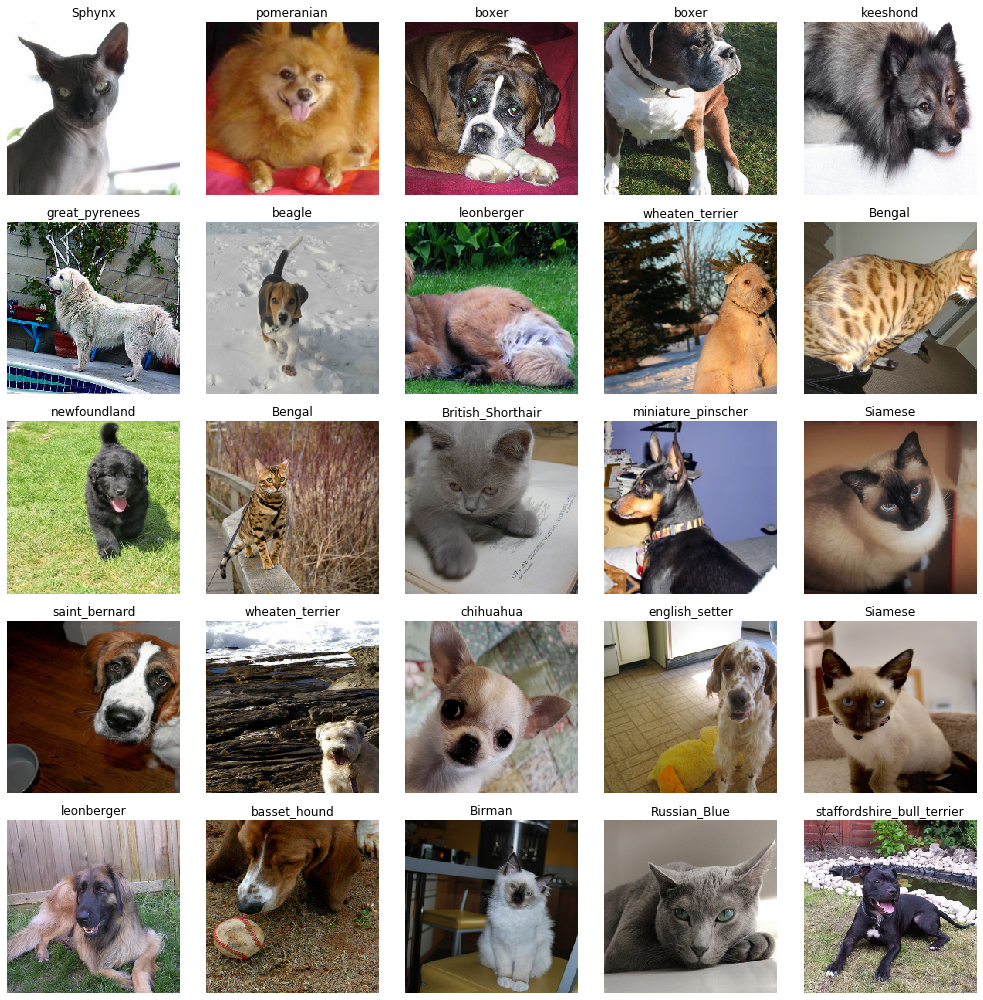

In [18]:
data.show_batch(row=3, figsize=(14,14))

In [19]:
print(data.classes)

['Abyssinian', 'Bengal', 'Birman', 'Bombay', 'British_Shorthair', 'Egyptian_Mau', 'Maine_Coon', 'Persian', 'Ragdoll', 'Russian_Blue', 'Siamese', 'Sphynx', 'american_bulldog', 'american_pit_bull_terrier', 'basset_hound', 'beagle', 'boxer', 'chihuahua', 'english_cocker_spaniel', 'english_setter', 'german_shorthaired', 'great_pyrenees', 'havanese', 'japanese_chin', 'keeshond', 'leonberger', 'miniature_pinscher', 'newfoundland', 'pomeranian', 'pug', 'saint_bernard', 'samoyed', 'scottish_terrier', 'shiba_inu', 'staffordshire_bull_terrier', 'wheaten_terrier', 'yorkshire_terrier']


In [20]:
len(data.classes), data.c

(37, 37)

In [21]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /Users/liyihao/.cache/torch/checkpoints/resnet34-333f7ec4.pth
100%|██████████| 83.3M/83.3M [00:31<00:00, 2.75MB/s]


In [22]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,1.371344,0.306997,0.100135,28:30
1,0.583719,0.280401,0.092693,28:43
2,0.376233,0.223412,0.071042,28:56
3,0.274151,0.208695,0.068336,28:49


In [23]:
learn.save('stage-1')

In [27]:
intern = ClassificationInterpretation.from_learner(learn)

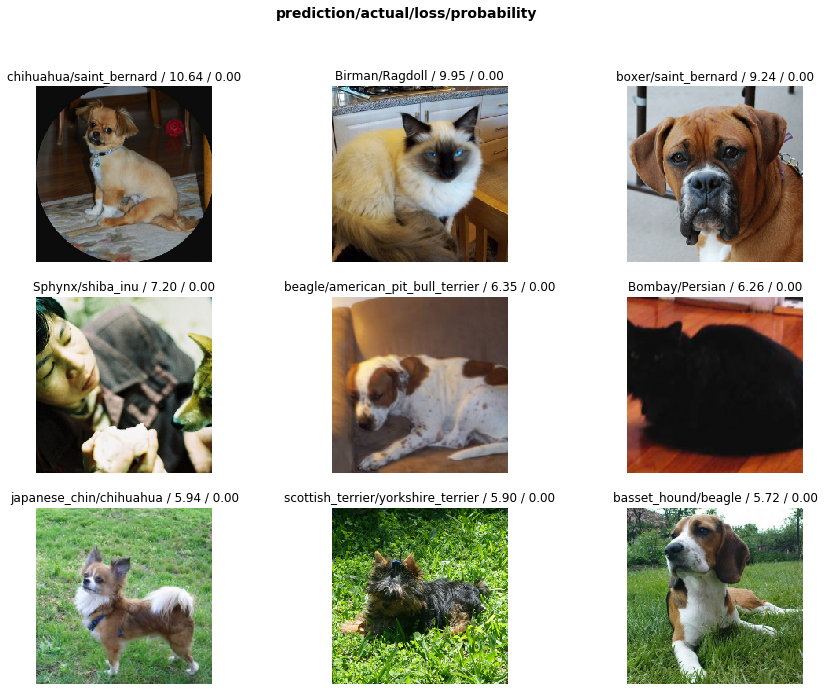

In [28]:
intern.plot_top_losses(9, figsize=(15, 11))

In [26]:
doc(intern.plot_top_losses)

_cl_int_plot_top_losses [source] [test] _cl_int_plot_top_losses ( k , largest = True , figsize = (12, 12) , heatmap : bool = False , heatmap_thresh : int = 16 , return_fig : bool = None ) → Optional [ Figure ] 
 
 × No tests found for _cl_int_plot_top_losses . To contribute a test please refer to this guide and this discussion . Show images in top_losses along with their prediction, actual, loss, and probability of actual class. 
 Show in docs

In [30]:
intern.most_confused(min_val=2)
doc(intern.most_confused)

most_confused [source] [test] most_confused ( min_val : int = 1 , slice_size : int = 1 ) → Collection [ Tuple [ str , str , int ]] 
 
 × No tests found for most_confused . To contribute a test please refer to this guide and this discussion . Sorted descending list of largest non-diagonal entries of confusion matrix, presented as actual, predicted, number of occurrences. 
 Show in docs

In [31]:
learn.unfreeze()

In [33]:
learn.load('stage-1')

Learner(data=ImageDataBunch;

Train: LabelList (5912 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
Egyptian_Mau,pug,basset_hound,Siamese,shiba_inu
Path: /Users/liyihao/.fastai/data/oxford-iiit-pet/images;

Valid: LabelList (1478 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
boxer,British_Shorthair,British_Shorthair,Sphynx,Bengal
Path: /Users/liyihao/.fastai/data/oxford-iiit-pet/images;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3)

In [34]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
